## Esercitazione di Potenziamento

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

Implementare le functioni necessarie per costruire il polinomio interpolante di Lagrange. 

                                                                [5 punti]
                                                         
                                                         

In [2]:
def plagr(xnodi,k):
    """
    Restituisce i coefficienti del k-esimo pol di
    Lagrange associato ai punti del vettore xnodi
    """
    xzeri=np.zeros_like(xnodi)
    n=xnodi.size # numero di nodi
    if k==0:
       xzeri=xnodi[1:n]
    else:
       xzeri=np.append(xnodi[0:k],xnodi[k+1:n]) # nodi senza il k-esimo
    num=np.poly(xzeri) # polinomio di grado n-1
    den=np.polyval(num,xnodi[k])
    p=num/den
    return p

def InterpL(x, f, xx):
     """"
        %funzione che determina in un insieme di punti il valore del polinomio
        %interpolante ottenuto dalla formula di Lagrange.
        % DATI INPUT
        %  x  vettore con i nodi dell'interpolazione
        %  f  vettore con i valori dei nodi 
        %  xx vettore con i punti in cui si vuole calcolare il polinomio
        % DATI OUTPUT
        %  y vettore contenente i valori assunti dal polinomio interpolante
        %
     """
     n=x.size
     m=xx.size
     L=np.zeros((m,n))
     for k in range(n):
        p=plagr(x,k)
        L[:,k]=np.polyval(p,xx)
     return np.dot(L,f)

Sia assegnata la funzione $f(x)=cos(\pi x)+sin(\pi x)$, $ x \in [0,2]$

facendo uso delle functions implementate precedentemente, si determini il polinomio p che interpola f nei nodi  x0 = 1, x1 = 1.5, x2 = 1.75.

                                                               [3 punti]

In [3]:
x = np.array([1,1.5,1.75])
f = lambda x: np.cos(np.pi*x)+np.sin(np.pi*x)
y = f(x)
xx = np.linspace(0,2,200) # 200 punti equispaziati tra 0 e 2
polL = InterpL(x,y,xx)

si rappresenti in uno stesso grafico la funzione f, il polinomio p e i punti di interpolazione assegnati;

                                                              [2 punti]

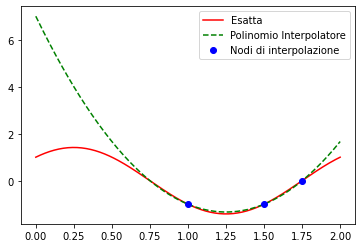

In [10]:
plt.plot(xx,f(xx),"r-", xx,polL,"g--", x,y,"bo")
plt.legend(["Esatta", "Polinomio Interpolatore", "Nodi di interpolazione"])

 si calcoli il valore assunto dalla funzione errore E(x) := |f(x) − p(x)| nel punto $x^∗$ = 0.75 e si definisca teoricamente da cosa dipende l'errore che si compie quando al posto del polinomio interpolatore si considera la funzione che ha generato i dati, commentando opportunamente la formula
 
                                                             [3 punti]

Errore di interpolazione in x=0.75:  [2.22044605e-16]


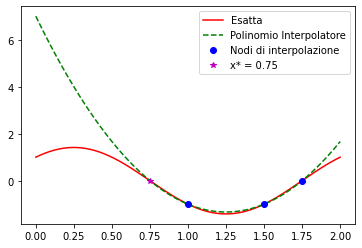

In [11]:
val075 = InterpL(x,y,np.array([0.75]))
errore = np.abs(f(0.75)-val075)
print("Errore di interpolazione in x=0.75: ", errore)

# per motivi didattici, disengno il valore di interpolazione
plt.plot(xx,f(xx),"r-", xx,polL,"g--", x,y,"bo", 0.75,val075,"m*")
plt.legend(["Esatta", "Polinomio Interpolatore", "Nodi di interpolazione", "x* = 0.75"])


si stabilisca qual è il polinomio interpolatore per f passante per i nodi $x^*$ 
, x0, x1 e x2.


                                                            [2 punti]

Si calcoli la costante di Lebesgue e si dica che ruolo svolge nell'ambito dell'interpolazione polinomiale

                                                             [3 punti]